In [1]:
import gym
import numpy as np
from collections import defaultdict 
import random
Q = defaultdict(dict)
EPSILON = 0.1
ALPHA = 0.1
GAMMA = 0.7
NO_OF_EPISODES = 150
TILE_SIZE = 0.1
VELOCITY_TILE_SIZE = 0.5
ACTION_TILE_SIZE = 0.2
env = gym.make('Pendulum-v0')

[2016-11-19 19:25:48,345] Making new env: Pendulum-v0


Action Space
Box(1,)
Observation Space
Box(3,)


In [2]:
def epsilon_greedy((i,j,k)):
    state = (i,j,k)
#     print state
    valid_actions = Q[state].keys()
    max_action = max(Q[state], key=Q[state].get)
    if np.random.random() < EPSILON:
#         print 'random action'
        random_action = np.random.randint(5)
        return random_action
    max_action = max(Q[state], key=Q[state].get)
    return max_action

In [3]:
def get_position_tile(i, j):
    theta = (y/x)
    x_coor = int((i+1) / TILE_SIZE)
    y_coor = int((j+1) / TILE_SIZE)
    
    return (x_coor, y_coor)
    
def get_velocity_tile(i):
    ang_vel = int((i+8) / VELOCITY_TILE_SIZE)
    return ang_vel

def get_discrete_state(S):
    (x_coor, y_coor) = get_position_tile(S[0], S[1])
    ang_vel = get_velocity_tile(S[2])
    return (x_coor, y_coor, ang_vel)

def get_discrete_action(A):
    return int((A+2)/ACTION_TILE_SIZE)
    print(env.action_space.high)
    print(env.action_space.low)

def init_Q():
    for i in range(0,int(2/TILE_SIZE)+1):
        for j in range(0,int(2/TILE_SIZE)+1):
            for k in range(0, int(16/VELOCITY_TILE_SIZE)+1):
                for action in range(int(4/ACTION_TILE_SIZE)+1):
                    Q[(i,j,k)][action] = 0 


In [4]:
def qlearning():
    init_Q()
    episode_rewards = []
    episode_steps = []
    for i in range(NO_OF_EPISODES):
        print('Episode Start %s'%(i))
        S = env.reset()
        print 'First Observation %s'%(S)
        total_episode_reward = 0
        no_of_steps_per_episode = 0
        done = False # When should this end because this is not a episodic task. 
        for t in range(1000): # change the terminal state 
            if t%5 == 0:
                env.render()
            discrete_S = get_discrete_state(S)
            A = epsilon_greedy(discrete_S) # Should change the state here
            S_next, reward, _, _ = env.step([(A-2)*ACTION_TILE_SIZE])
            total_episode_reward += reward
            discrete_S_next = get_discrete_state(S_next)
            A_next = max(Q[discrete_S_next], key=Q[discrete_S_next].get)
            Q[discrete_S][A] = Q[discrete_S][A] + ALPHA*(reward + GAMMA*Q[discrete_S_next][A_next] - Q[discrete_S][A])
            S = S_next
            no_of_steps_per_episode += 1
        episode_rewards.append(total_episode_reward)
        episode_steps.append(no_of_steps_per_episode)
#         print Q
#         break
    return episode_rewards, episode_steps

In [5]:
episode_rewards, _ = qlearning()
print episode_rewards
# get_position_tile(0, 0)

Episode Start 0
First Observation [ 0.17933656 -0.98378778  0.15361921]


NameError: global name 'y' is not defined

In [10]:
import numpy as np
import math
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
#     return(rho, phi)
    angle = math.degrees(phi)
    if angle < 0:
        angle = 360 + angle
    return angle

print cart2pol(1,0)
print cart2pol(0,1)
print cart2pol(0,-1)
print cart2pol(-1,0)


0.0
90.0
270.0
180.0


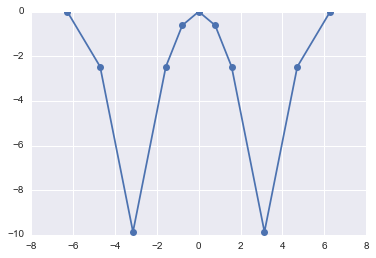

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

def angle_normalize(x):
    return (((x+np.pi) % (2*np.pi)) - np.pi)

ANGLES = [-(2*np.pi), -((3*np.pi)/2) , -np.pi, -np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2, np.pi,  (3*np.pi)/2, 2*np.pi]
res = []
for angle in ANGLES:
    res.append(-(angle_normalize(angle) ** 2))
plt.plot(ANGLES, res, marker='o')


In [1]:
import gym
import math
import numpy as np
def normalize_angle(x):
    x = (x % (2*np.pi))
    if x < 0:
        return ( x + (2*np.pi))
    return x
env = gym.make('Pendulum-v0')

= env.reset()
env.render()
print firstobs
print "Sin : %f"%(np.sin(firstobs[0]))
print "Cos : %f"%(np.cos(firstobs[0]))
print math.degrees(normalize_angle(firstobs[0]))

# for i in range(100):
#     result = env.step([0])
#     env.render()
#     print math.degrees(normalize_angle(result[0][0]))
#     print result

[2016-11-20 16:45:28,457] Making new env: Pendulum-v0


Action Space
Box(1,)
Observation Space
Box(3,)
[-0.29146927 -0.02921624]
Sin : -0.287360
Cos : 0.957823
343.30004075


In [2]:
import numpy as np
import math

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
#     return(rho, phi)
    angle = math.degrees(phi)
    if angle < 0:
        angle = 360 + angle
    return angle

# print cart2pol(-0.98412055,  0.17750141)
# print cart2pol(0.17750141, -0.98412055)
print math.degrees(3*np.pi)
print math.degrees(-3.14)

def normalize_angle(x):
    x = (x % (2*np.pi))
    if x < 0:
        return ( x + (2*np.pi))
    return x

print normalize_angle(3*np.pi)
print normalize_angle(-3*np.pi)

540.0
-179.908747671
3.14159265359
3.14159265359


In [6]:
print normalize_angle(-7.5*np.pi)

1.57079632679
